In [1]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf


#티스토리 업로드시 최적화 코드
#from IPython.core.display import display, HTML
#display(HTML("<style>.container {width:90% !important;}</style>"))

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (3,906 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

# 2023.04.17
# EDA
Dataset Info.

train.csv [파일]

    ID : 샘플 고유 ID
    User-ID : 유저 고유 ID
    Book-ID : 도서 고유 ID
    유저 정보
    Age : 나이
    Location : 지역
    도서 정보
    Book-Title : 도서 명
    Book-Author : 도서 저자
    Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    Publisher : 출판사
    Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점)


test.csv [파일]

    ID : 샘플 고유 ID
    User-ID : 유저 고유 ID
    Book-ID : 도서 고유 ID
    유저 정보
    Age : 나이
    Location : 지역
    도서 정보
    Book-Title : 도서 명
    Book-Author : 도서 저자
    Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    Publisher : 출판사


sample_submission.csv [제출양식]

    ID : 샘플 고유 ID
    Book-Rating : 예측한 유저가 도서에 부여할 평점

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_dir = '/content/drive/MyDrive/데이콘/데이콘 도서 추천 알고리즘'

In [3]:
import numpy as np
import random
import os
import gc

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [5]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [6]:
csv_to_parquet(file_dir + '/train.csv', 'train')
csv_to_parquet(file_dir + '/test.csv', 'test')

train Done.
test Done.


In [7]:
train = pd.read_parquet('/content/train.parquet')
test = pd.read_parquet('/content/test.parquet')
sample_submission = pd.read_csv(file_dir+'/sample_submission.csv', index_col = 0)

In [8]:
train.head(10)

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
5,TRAIN_000005,USER_00000,BOOK_206799,5,23.0,"sackville, new brunswick, canada",Neuromancer (Remembering Tomorrow),William Gibson,1995.0,Ace Books
6,TRAIN_000006,USER_00000,BOOK_239414,9,23.0,"sackville, new brunswick, canada",The Little Prince,Antoine de Saint-ExupÃ©ry,1982.0,Harvest Books
7,TRAIN_000007,USER_00000,BOOK_269070,0,23.0,"sackville, new brunswick, canada",Forests of the Heart (Newford),Charles de Lint,2001.0,Tor Books
8,TRAIN_000008,USER_00001,BOOK_190739,7,35.0,"wake forest, north carolina, usa",Self Matters : Creating Your Life from the Ins...,Phillip C. McGraw,2001.0,Free Press
9,TRAIN_000009,USER_00001,BOOK_210079,0,35.0,"wake forest, north carolina, usa",The Self Matters Companion : Helping You Creat...,Phillip C. McGraw,2002.0,Free Press


                     결손값 개수  결손값_ratio
ID                        0        0.0
User-ID                   0        0.0
Book-ID                   0        0.0
Book-Rating               0        0.0
Age                       0        0.0
Location                  0        0.0
Book-Title                0        0.0
Book-Author               0        0.0
Year-Of-Publication       0        0.0
Publisher                 0        0.0
                     결손값 개수  결손값_ratio
ID                        0        0.0
User-ID                   0        0.0
Book-ID                   0        0.0
Age                       0        0.0
Location                  0        0.0
Book-Title                0        0.0
Book-Author               0        0.0
Year-Of-Publication       0        0.0
Publisher                 0        0.0


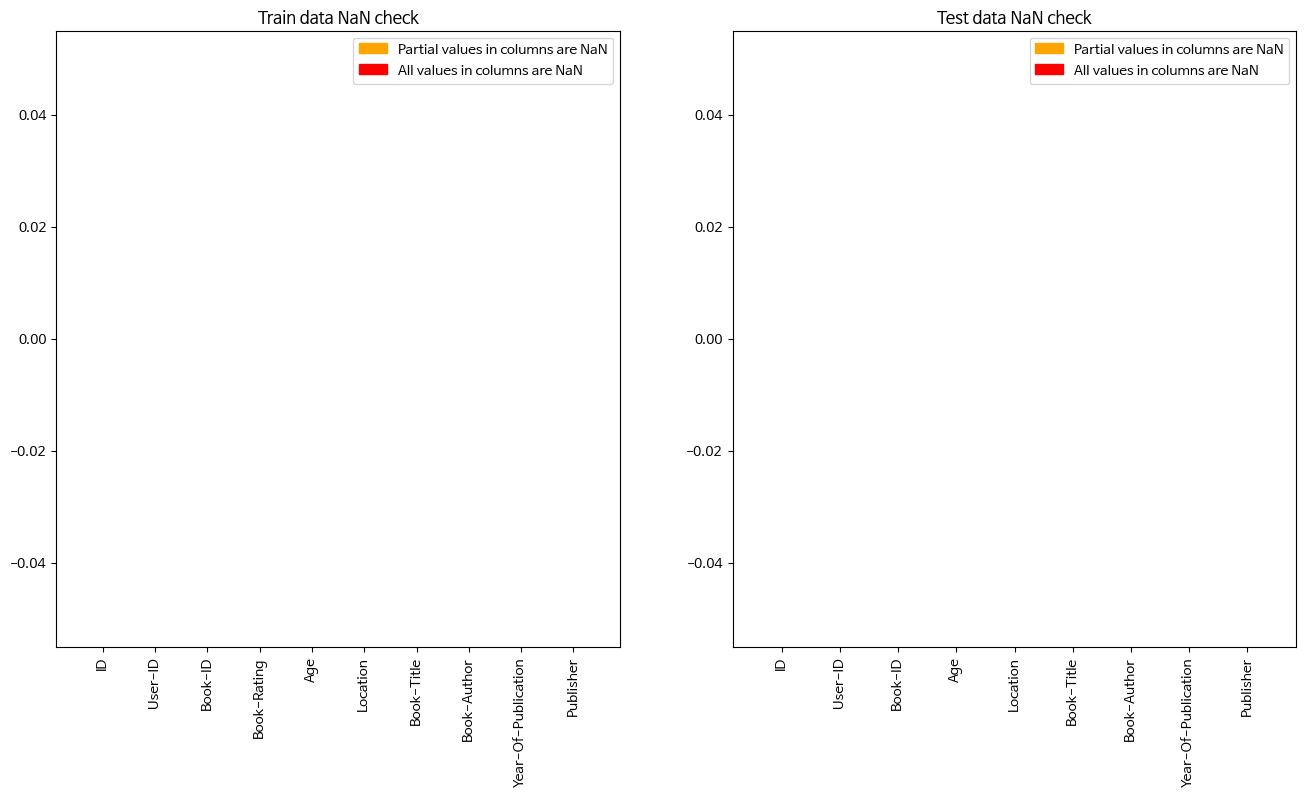

In [9]:
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

column = ['결손값 개수']
axis_1 = pd.DataFrame(data = train.isnull().sum(axis=1), columns = column)
axis_1 = axis_1.sort_values(by = '결손값 개수', ascending = False)

train.isnull().sum(axis=0)
train_row_NaN = pd.DataFrame(train.isnull().sum(axis=0), columns = column)
train_row_NaN = train_row_NaN.sort_values(by = '결손값 개수', ascending = False)
train_row_su = train.shape[0]
train_row_NaN['결손값_ratio'] = train_row_NaN['결손값 개수']/train_row_su

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize = (16,8))
x = np.arange(len(train_row_NaN.index))
plt.subplot(1, 2, 1)
plt.xticks(x, train_row_NaN.index)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='orange'),
                    mpatches.Patch(color='red')], 
           labels=['Partial values in columns are NaN', 'All values in columns are NaN'])

def color(data):
    if data == 1:
        return 'red'
    else:
        return 'orange'
plt.bar(x, train_row_NaN['결손값_ratio'], color = [color(i) for i in train_row_NaN['결손값_ratio']])
plt.title('Train data NaN check')

test.isnull().sum(axis=0)
test_row_NaN = pd.DataFrame(test.isnull().sum(axis=0), columns = column)
test_row_NaN = test_row_NaN.sort_values(by = '결손값 개수', ascending = False)
test_row_su = test.shape[0]
test_row_NaN['결손값_ratio'] = test_row_NaN['결손값 개수']/test_row_su

plt.subplot(1, 2, 2)
x2 = np.arange(len(test_row_NaN.index))
plt.xticks(x2, test_row_NaN.index)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='orange'),
                    mpatches.Patch(color='red')], 
           labels=['Partial values in columns are NaN', 'All values in columns are NaN'])
plt.bar(x2, test_row_NaN['결손값_ratio'], color = [color(i) for i in test_row_NaN['결손값_ratio']])
plt.title('Test data NaN check')

print(train_row_NaN)
print(test_row_NaN)
plt.show()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [11]:
train['Book-Title'] = train['Book-Title'].astype('str')
train['Book-Author'] = train['Book-Author'].astype('str')

title_corpus = ' '.join(train['Book-Title'])
Author_corpus = ' '.join(train['Book-Author'])

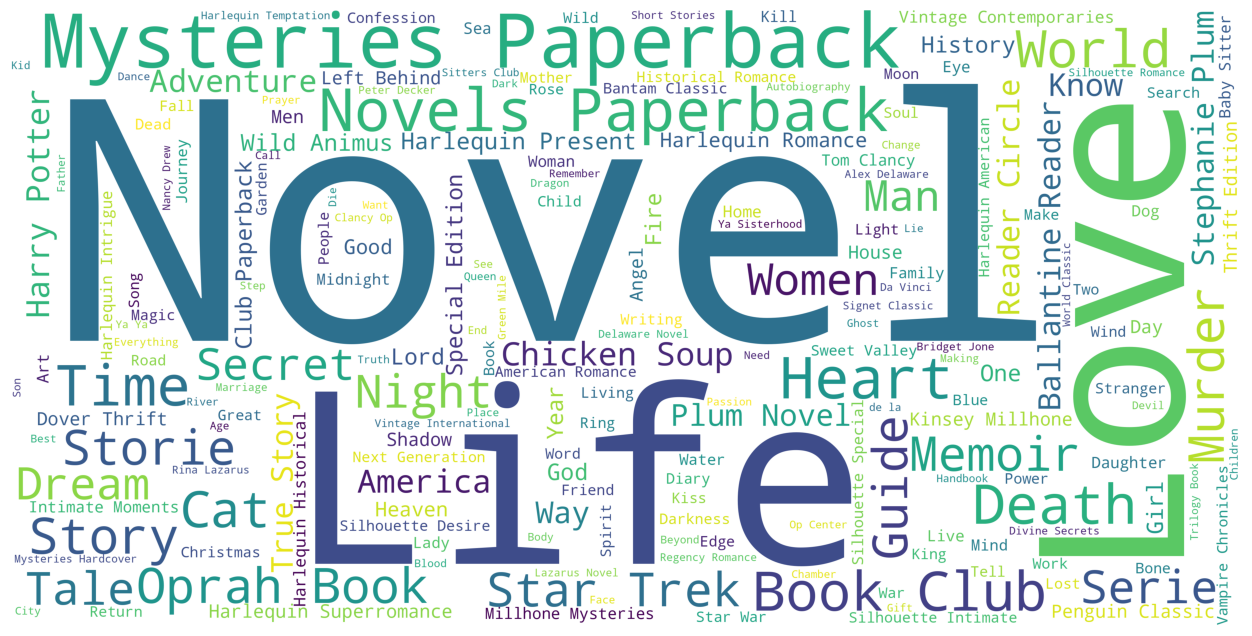

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

책제목에 많이 사용되는 키워드는 Novel, LOVE, LIFE 등이 있으며 Mysteries와 같은 장르나 paperback(soft cover) 제본양식 등이 자주 등장한다.

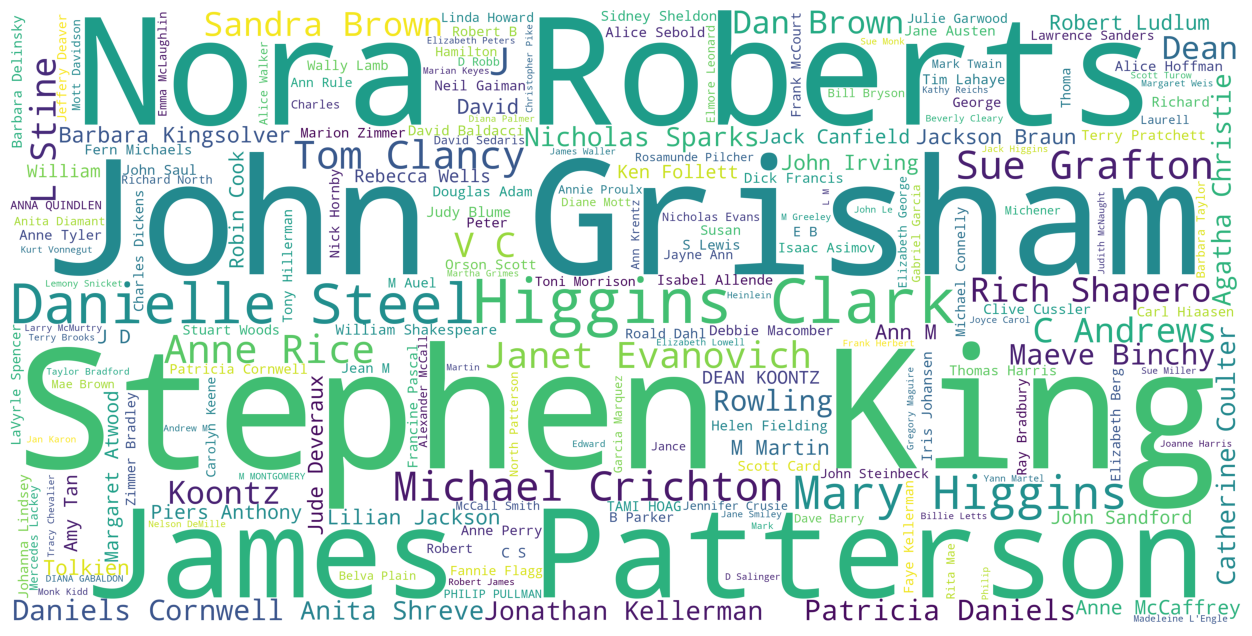

In [13]:
Author_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(Author_corpus)
plt.figure(figsize=(16,8))
plt.imshow(Author_wordcloud)
plt.axis('off')
plt.show()

공포, 초자연 등의 호러소설 작가인 Stephen King, 로맨스 소설 작가인 Nora Roberts 등 장르로 나눌 수 있는 저명한 작가들의 이름이 자주 등장하는 것을 확인할 수 있다.

In [14]:
train[['User-ID','Location']].drop_duplicates().groupby(['User-ID'])['Location'].count().sort_values()

User-ID
USER_00000    1
USER_61443    1
USER_61442    1
USER_61441    1
USER_61440    1
             ..
USER_30605    1
USER_30604    1
USER_30603    1
USER_30622    1
USER_92100    1
Name: Location, Length: 83256, dtype: int64

User-ID를 기준으로 Location은 고유의 값이라는 것을 확인 할 수 있습니다. 즉, 평가를 해주는 유저의 지역은 고유의 값입니다.

In [15]:
train['Country'] = [(i.split(',')[-1]).upper() for i in train['Location']]

In [16]:
train['Country'].unique()

array([' CANADA', ' USA', ' GERMANY', ' SPAIN', ' AUSTRALIA',
       ' UNITED KINGDOM', '', ' ITALY', ' NETHERLANDS', ' PORTUGAL',
       ' SWEDEN', ' AUSTRIA', ' FRANCE', ' FINLAND', ' NEW ZEALAND',
       ' SINGAPORE', ' SWITZERLAND', ' PHILIPPINES', ' ESPAÑA',
       ' MALAYSIA', ' BELGIUM', ' JAPAN', ' DENMARK', ' BELIZE',
       ' ENGLAND', ' POLAND', ' IRELAND', ' HAITI',
       ' TRINIDAD AND TOBAGO', ' DEUTSCHLAND', ' TANZANIA', ' MOLDOVA',
       ' BULGARIA', ' LUXEMBOURG', ' SOUTH AFRICA', ' CZECH REPUBLIC',
       ' ISRAEL', ' MALTA', ' PETROLWAR NATION', ' KUWAIT', ' PERU',
       ' ECUADOR', ' SOUTH KOREA', ' TURKEY', ' NIGERIA', ' BRAZIL',
       ' HUNGARY', ' INDONESIA', ' KAZAKHSTAN', ' INDIA', ' CHINA',
       ' EGYPT', ' CROATIA', ' TAIWAN', ' ARGENTINA', ' CHILE',
       ' VENEZUELA', ' GALIZA', ' ICELAND', ' SCOTLAND', ' BOLIVIA',
       ' LITHUANIA', ' NORWAY', ' MEXICO', ' BAHAMAS', ' UNITED SATES',
       ' ROMANIA', ' IRAN', ' DOMINICAN REPUBLIC', ' MARICOPA',
 

Location을 ','로 나누면 마지막 단어가 나라입니다. 해당 열을 새로 만들어줍니다.

In [18]:
con_df = pd.DataFrame(train['Country'].value_counts())
con_df = con_df.reset_index()
con_df.columns = ['Country','num_country']
print(con_df.head(10))
print(con_df)

           Country  num_country
0              USA       630043
1           CANADA        78571
2   UNITED KINGDOM        27050
3          GERMANY        23471
4                         21012
5        AUSTRALIA        15270
6            SPAIN        12515
7              N/A        11176
8           FRANCE         8962
9         PORTUGAL         5974
               Country  num_country
0                  USA       630043
1               CANADA        78571
2       UNITED KINGDOM        27050
3              GERMANY        23471
4                             21012
..                 ...          ...
239              PALAU            1
240      GALIZA NEGHRA            1
241          MACEDONIA            1
242     PRINCE WILLIAM            1
243   RICHMOND COUNTRY            1

[244 rows x 2 columns]


지역이 Null이거나 N/A 처럼 표기된 곳도 있고, PRINCE WILLIAM, RICHMOND COUNTRY과 같이 이상한 지역도 있습니다. 엄밀하게는 나라말고 이상한 것들이 끼어있습니다. 해당 자료는 전처리가 필요합니다.

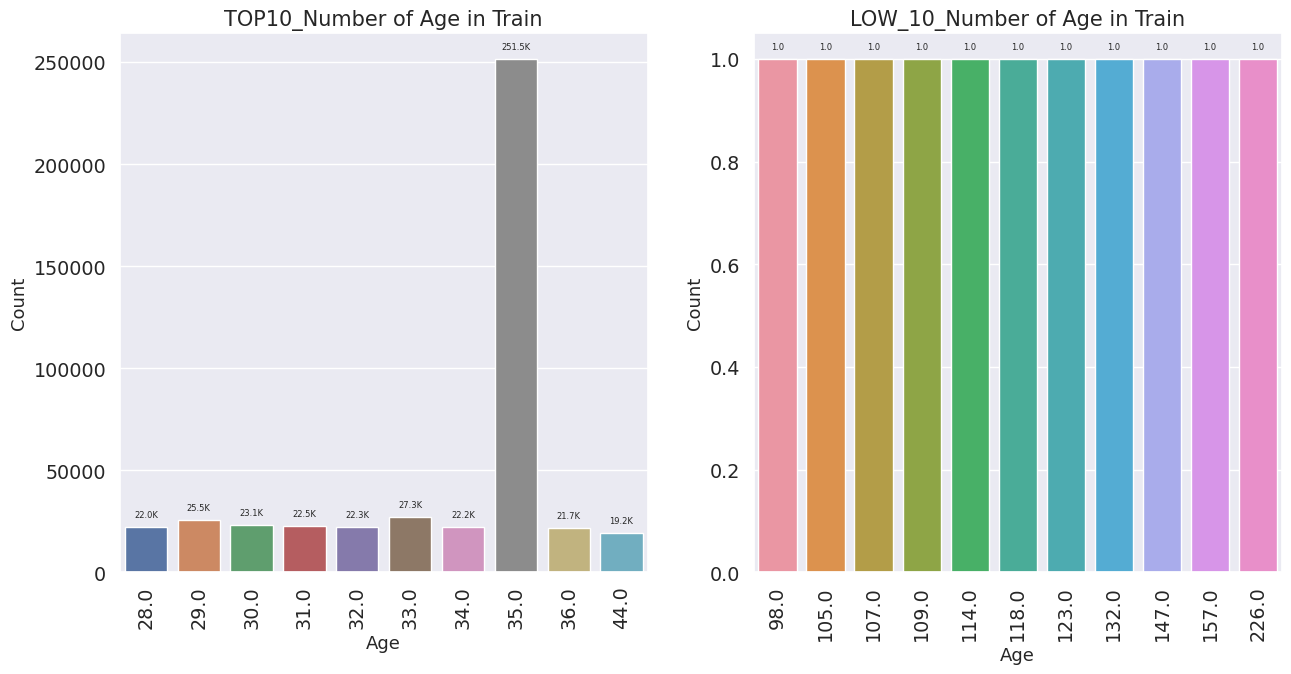

In [43]:
def km_gb(value):
    if value < 1e6:
        return format((value/1e3), '.01f')+"K"
    else:
        return format((value/1e6), '.01f')+"M"

import seaborn as sns

train_age = train.groupby("Age").size()

train_age = train_age.reset_index()
train_age.columns = ["Age", "count"]
train_age = train_age.sort_values(by = "count", ascending = False)
train_age['rank'] = train_age['count'].rank(ascending=False) 
train_age = train_age[train_age['rank']<= 10]

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
splot=sns.barplot(x="Age",y="count",data = train_age)
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Age", size =13)
plt.xticks(rotation = 90)
plt.ylabel("Count",size =13)
plt.title('TOP10_Number of Age in Train')


train_bot = train.groupby("Age").size()

train_bot = train_bot.reset_index()
train_bot.columns = ["Age", "count"]
train_bot = train_bot.sort_values(by = "count", ascending = False)
train_bot['rank'] = train_bot['count'].rank(ascending=True) 
train_bot = train_bot[train_bot['rank']<= 10]

plt.subplot(1, 2, 2)
splot=sns.barplot(x="Age",y="count",data = train_bot)
for p in splot.patches:
    splot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Age", size =13)
plt.xticks(rotation = 90)
plt.ylabel("Count",size =13)
plt.title('LOW_10_Number of Age in Train')

plt.show()


In [46]:
import matplotlib.pyplot as plt

train.groupby("Age").size()

Age
0.0      495
1.0      361
2.0      278
3.0      128
4.0      250
        ... 
228.0     48
229.0     11
237.0      2
239.0    116
244.0      7
Length: 137, dtype: int64